# Matching Pursuit

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

We import the h0

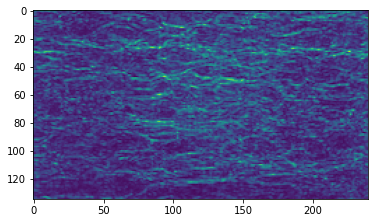

In [23]:
#Import image
h = Image.open('from_camera/test03/dist_00000.png')
realsize=h.size
factor=8
newsize=tuple(int(ti/factor) for ti in realsize)

h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h,dtype=float)
h = h[:, :, 0]
h -= h.mean()

plt.imshow(h)
plt.show()

Autocorrelation to check if it is a good PSF

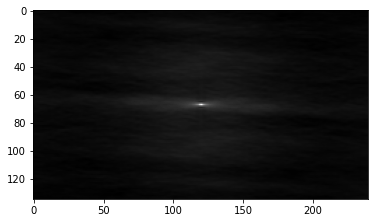

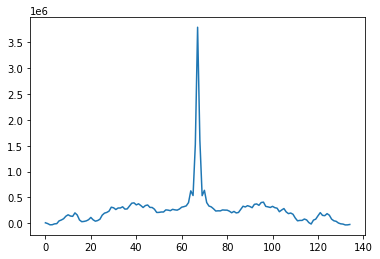

In [24]:
hf = np.flip(h)
h_auto=signal.fftconvolve(h,hf,mode='same')

# Plotting
[h_auto_y,h_auto_x]=h_auto.shape
plt.imshow(h_auto,cmap='gray')
plt.show()
plt.plot(h_auto[:,int(h_auto_x/2)+1])
plt.show()

We generate the image x

[ 83  71  18  69  24 106 115  66 114  10]
[104   6 131 104 100  79  49 148  71  64]


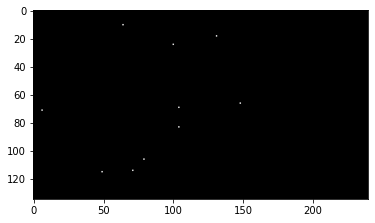

In [25]:
np.random.seed(2)
x=np.zeros((h_auto_y,h_auto_x),dtype=float)
k=10
random_x=(np.random.rand(k)*h_auto_x).astype(int)
random_y=(np.random.rand(k)*h_auto_y).astype(int)
x[random_y,random_x]=1
print(random_y)
print(random_x)
plt.imshow(x,cmap='gray')
plt.show()

We generate y as x*h

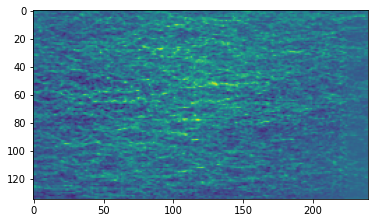

In [26]:
y=signal.fftconvolve(x,h,mode='same')
plt.imshow(y)
plt.show()

First, we start with one single comparation

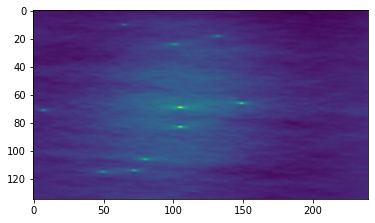

[69.0, 105.0]


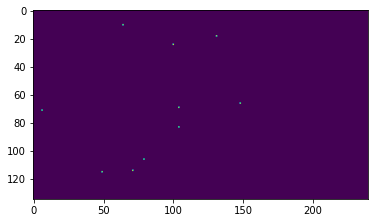

In [27]:
# for i in range(k):
x_star=signal.fftconvolve(y,np.flip(h),mode='same')
plt.imshow(x_star)
plt.show()

max_=np.amax(x_star)
[max_y,max_x]=np.where(x_star==max_)
max_y=float(max_y)
max_x=float(max_x)
print([max_y,max_x])

plt.imshow(x)
plt.show()

MP

[68, 104]
[82, 104]
[65, 148]
[105, 79]
[68, 104]
[113, 71]
[114, 49]
[23, 100]
[70, 6]
[82, 104]


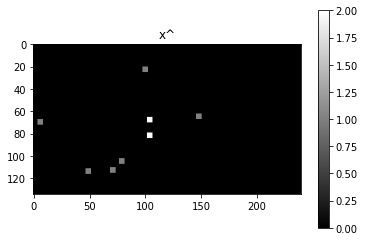

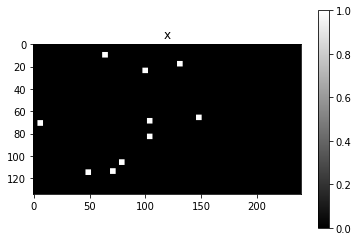

In [28]:
x_hat=np.zeros((h_auto_y,h_auto_x),dtype=float)
y_mp=np.copy(y)
for i in range(k):
    x_star=signal.fftconvolve(y_mp,np.flip(h),mode='same')
    [max_y,max_x]=np.where(x_star==np.amax(x_star))
    z=np.zeros((h_auto_y,h_auto_x),dtype=float)
    z[max_y-1,max_x-1]=1
    x_hat+=z
    zz=signal.fftconvolve(z,h,mode='same')
    y_mp-=zz
    print([int(max_y-1),int(max_x-1)])
    # plt.imshow(signal.fftconvolve(z,np.array([[1,1,1],[1,1,1],[1,1,1]])),cmap='gray')
    # plt.show()
    
    
plt.figure()
plt.imshow(signal.fftconvolve(x_hat,np.ones((5,5),dtype=float),mode='same'),cmap='gray')
plt.colorbar()
plt.title('x^')
plt.show()

plt.imshow(signal.fftconvolve(x,np.ones((5,5),dtype=float),mode='same'),cmap='gray')
plt.colorbar()
plt.title('x')
plt.show()


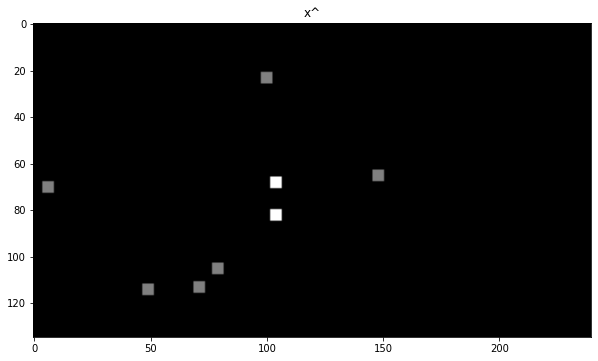

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(signal.fftconvolve(x_hat,np.ones((5,5),dtype=float),mode='same'),cmap='gray')
plt.title('x^')
plt.show()

0.0


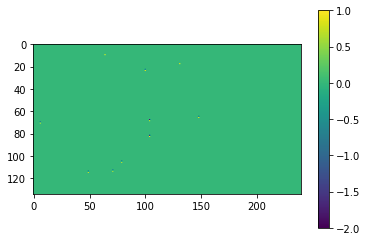

In [30]:
print(np.sum(x-x_hat))
plt.figure()
plt.imshow(x-x_hat)
plt.colorbar()
plt.show()

In [31]:
np.linalg.norm(x-x_hat)

4.898979485566356

In [32]:
# SNR
ratio=np.linalg.norm(x)/np.linalg.norm(x-x_hat)
snr=20*np.log10(ratio)

print(ratio)
print(snr)

0.6454972243679029
-3.802112417116059


## Complex figure: Dotted letter A

932


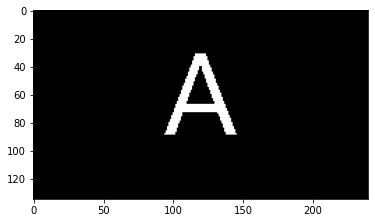

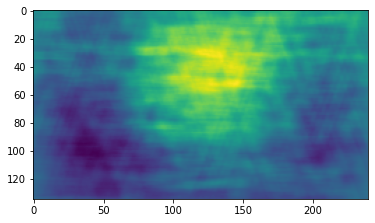

In [33]:
x = Image.open('images/a.png')
x=x.resize(newsize,Image.ANTIALIAS)
x = np.array(x,dtype=float)
x = x[:, :, 0]
x = np.where(x>127, 1.0, 0.0)
print(np.count_nonzero(x == 1))
# plt.figure(figsize=(8,8))
plt.imshow(x,cmap='gray')
plt.show()

y=signal.fftconvolve(x,h,mode='same')
plt.imshow(y)
plt.show()

In [38]:
x_hat=np.zeros((h_auto_y,h_auto_x),dtype=float)
y_mp=np.copy(y)
for i in range(1000):
    x_star=signal.fftconvolve(y_mp,np.flip(h),mode='same')
    [max_y,max_x]=np.where(x_star==np.amax(x_star))
    z=np.zeros((h_auto_y,h_auto_x),dtype=float)
    z[max_y-1,max_x-1]=1
    # z=signal.fftconvolve(z,np.ones((20,20),dtype=float),mode='same')
    x_hat+=z
    zz=signal.fftconvolve(z,h,mode='same')
    y_mp-=zz
    # print([int(max_y-1),int(max_x-1)])
    # plt.imshow(signal.fftconvolve(z,np.array([[1,1,1],[1,1,1],[1,1,1]])),cmap='gray')
    # plt.show()


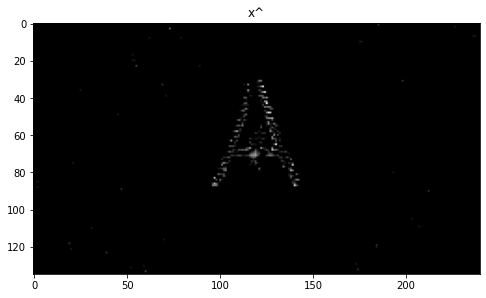

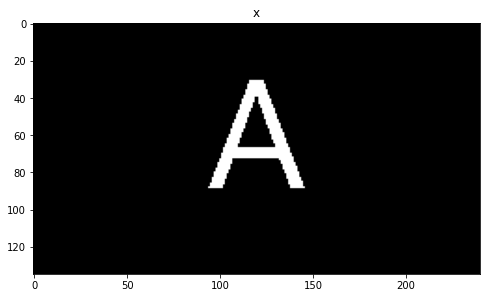

In [39]:
plt.figure(figsize=(8,8))
plt.imshow(x_hat,cmap='gray')
plt.title('x^')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(x,cmap='gray')
plt.title('x')
plt.show()